<a href="https://colab.research.google.com/github/boomboodo/google-colab/blob/master/Normal_VS_Pneumonia_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install git+https://github.com/raghakot/keras-vis.git -U

  Cloning https://github.com/raghakot/keras-vis.git to /tmp/pip-req-build-59dddnhe
  Running command git clone -q https://github.com/raghakot/keras-vis.git /tmp/pip-req-build-59dddnhe
  Stored in directory: /tmp/pip-ephem-wheel-cache-crurt05r/wheels/c5/ae/e7/b34d1cb48b1898f606a5cce08ebc9521fa0588f37f1e590d9f
Successfully built keras-vis
  Found existing installation: keras-vis 0.4.1
    Uninstalling keras-vis-0.4.1:
      Successfully uninstalled keras-vis-0.4.1


In [2]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, ZeroPadding2D
from keras import backend as K
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
K.set_image_dim_ordering('th')
K.set_image_data_format('channels_last')

In [6]:
#1
train_datagen = ImageDataGenerator(rescale = 1./255, 
                                    width_shift_range = 0.1,
                                    height_shift_range = 0.1,
                                    rotation_range = 10,
                                    zoom_range = 0.1,)
train_generator = train_datagen.flow_from_directory(
        '/gdrive/My Drive/Colab Notebooks/Normal_VS_Pneumonia/chest_xray/train/', 
        target_size = (256, 256),
        color_mode = 'grayscale',
        batch_size = 10,                   
        class_mode = 'binary')


#2
val_datagen = ImageDataGenerator(rescale = 1./255)
val_generator = val_datagen.flow_from_directory(
        '/gdrive/My Drive/Colab Notebooks/Normal_VS_Pneumonia/chest_xray/val/',
        target_size = (256, 256),
        color_mode = 'grayscale',
        batch_size = 10,
        class_mode = 'binary')


#3
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory(
        '/gdrive/My Drive/Colab Notebooks/Normal_VS_Pneumonia/chest_xray/test/',
        target_size = (256, 256),
        color_mode = 'grayscale',
        batch_size = 1,
        class_mode = 'binary')

Found 4197 images belonging to 2 classes.
Found 1055 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [0]:
nb_train_iterations = len(train_generator)
nb_val_iterations = len(val_generator)
nb_test_iterations = len(test_generator)

In [12]:
from keras import layers
from keras import models
from keras import optimizers

model = Sequential() 
model.add(ZeroPadding2D((1, 1), input_shape = (256, 256, 1)))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2), strides = (2, 2)))


model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2), strides = (2, 2)))


model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(256, (3, 3), activation = 'relu'))
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(256, (3, 3), activation = 'relu'))
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(256, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2), strides = (2, 2))) 


model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(512, (3, 3), activation = 'relu')) 
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(512, (3, 3), activation = 'relu'))
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(512, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2), strides = (2, 2)))


model.add(Flatten()) #top layer of the VGG net 
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.5)) 
model.add(Dense(1, activation = 'sigmoid'))

model.load_weights('/gdrive/My Drive/Colab Notebooks/Normal_VS_Pneumonia/vgg16_model_weights/weights-improvement-33-0.06.h5')
model.compile(loss = 'binary_crossentropy', optimizer = optimizers.adam(lr = 0.0001), metrics = ['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_21 (ZeroPaddi (None, 258, 258, 1)       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 256, 256, 64)      640       
_________________________________________________________________
zero_padding2d_22 (ZeroPaddi (None, 258, 258, 64)      0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 256, 256, 64)      36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 128, 128, 64)      0         
_________________________________________________________________
zero_padding2d_23 (ZeroPaddi (None, 130, 130, 64)      0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 128, 128, 128)     73856     
__________

In [0]:
#checkpoint
filepath='/gdrive/My Drive/Colab Notebooks/Normal_VS_Pneumonia/model_weights/weights-improvement-{epoch:02d}-{val_loss:.2f}.h5'
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [0]:
history = model.fit_generator(train_generator, 
                              steps_per_epoch = nb_train_iterations,
                              epochs = 10,
                              validation_data = val_generator,
                              validation_steps = nb_val_iterations,
                              callbacks = callbacks_list)

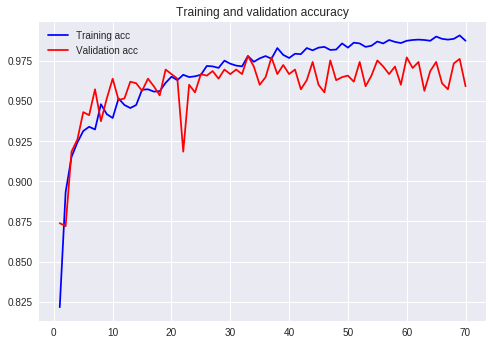

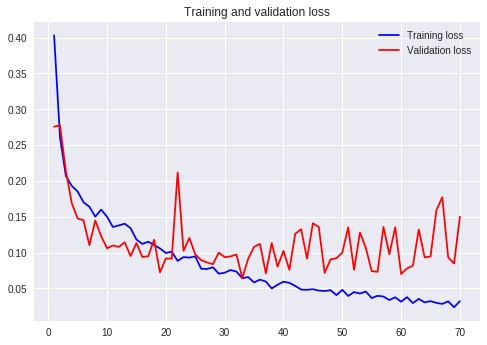

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'blue', label = 'Training acc')
plt.plot(epochs, val_acc, 'red', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'blue', label = 'Training loss')
plt.plot(epochs, val_loss, 'red', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [15]:
print('-- Evaluation --\n')

scores = model.evaluate_generator(test_generator, steps = nb_test_iterations)

print('%s: %.2f%%\n\n' %(model.metrics_names[1], scores[1] * 100))

# 모델 예측하기
print('-- Prediction --\n')

output = model.predict_generator(test_generator, steps = nb_test_iterations)

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

print(output)

y_pred = np.take(output, range(len(output)))
y_pred = np.rint(y_pred)

-- Evaluation --

acc: 76.76%


-- Prediction --

[[0.904]
 [1.000]
 [0.186]
 [1.000]
 [1.000]
 [0.988]
 [1.000]
 [1.000]
 [0.382]
 [0.892]
 [1.000]
 [1.000]
 [0.133]
 [0.500]
 [0.203]
 [0.103]
 [0.855]
 [0.425]
 [1.000]
 [1.000]
 [0.986]
 [0.644]
 [1.000]
 [0.232]
 [1.000]
 [0.042]
 [1.000]
 [0.949]
 [1.000]
 [0.993]
 [0.202]
 [1.000]
 [0.999]
 [0.953]
 [0.116]
 [0.993]
 [0.991]
 [1.000]
 [1.000]
 [0.611]
 [1.000]
 [1.000]
 [1.000]
 [1.000]
 [1.000]
 [1.000]
 [1.000]
 [1.000]
 [0.019]
 [0.993]
 [0.944]
 [1.000]
 [0.742]
 [0.899]
 [1.000]
 [1.000]
 [1.000]
 [1.000]
 [0.999]
 [1.000]
 [0.948]
 [0.965]
 [0.999]
 [1.000]
 [0.254]
 [1.000]
 [0.073]
 [0.999]
 [1.000]
 [1.000]
 [1.000]
 [1.000]
 [0.999]
 [1.000]
 [1.000]
 [0.055]
 [1.000]
 [1.000]
 [0.970]
 [0.999]
 [1.000]
 [1.000]
 [0.319]
 [1.000]
 [1.000]
 [1.000]
 [1.000]
 [1.000]
 [0.996]
 [1.000]
 [0.057]
 [1.000]
 [1.000]
 [1.000]
 [1.000]
 [1.000]
 [1.000]
 [0.100]
 [1.000]
 [1.000]
 [1.000]
 [1.000]
 [0.049]
 [1.000]
 [1.000]
 [0.7

-- Confusion Matrix --



<Figure size 432x288 with 0 Axes>

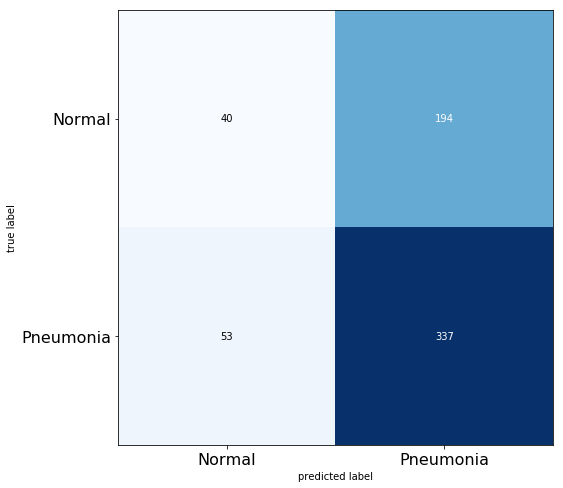

In [16]:
from mlxtend.plotting import plot_confusion_matrix

print('-- Confusion Matrix --\n')
CM = confusion_matrix(test_generator.labels, y_pred)
plt.figure()
plot_confusion_matrix(CM, figsize = (12, 8), hide_ticks = True, cmap = plt.cm.Blues)
plt.xticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.yticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.show()

In [17]:
print(test_generator.labels)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 